In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

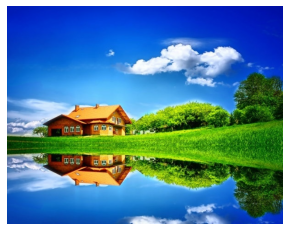

In [29]:
a = cv2.imread('sc2.jpg')
a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(a)
plt.axis('off')
plt.show()

In [30]:
a.shape

(474, 600, 3)

In [31]:
a_re = a.reshape(474*600,3)
a_re.shape

(284400, 3)

In [32]:
def rgb2hex(rgb):
    res = "#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[2]),int(rgb[2]))
    return res

In [33]:
print(rgb2hex([255,0,0]))

#ff0000


In [34]:
from sklearn.cluster import KMeans
from collections import Counter

In [35]:
k5 = KMeans(n_clusters=5)
k5.fit(a_re)

ypred5 = k5.predict(a_re)

In [37]:
c1 = Counter(ypred5)
print(c1)

Counter({3: 99504, 0: 61858, 1: 56507, 2: 39539, 4: 26992})


In [38]:
cent5 = k5.cluster_centers_
print(cent5)

[[ 69.81261317 152.10488877 225.02045072]
 [ 39.96936259  75.47405489  11.41950363]
 [140.82617247 176.56807867  33.95526979]
 [  6.84929237  70.99549002 199.67869663]
 [186.98631204 213.95099785 235.57174123]]


In [39]:
col_in_img = [rgb2hex(cent5[i]) for i in c1.keys()]  # i=0,1,2,3,4
col_in_img

['#06c7c7', '#45e1e1', '#baebeb', '#270b0b', '#8c2121']

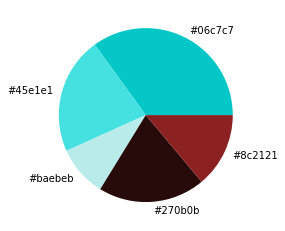

In [40]:
plt.pie(c1.values(),labels=col_in_img,colors=col_in_img)
plt.show()

In [41]:
def rgb2hex(rgb):
    res = "#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[2]),int(rgb[2]))
    return res


def img_k_cluster(img,k):
    img_re = img.reshape(img.shape[0]*img.shape[1],3)
    model = KMeans(n_clusters=k)
    model.fit(img_re)
    ypred = model.predict(img_re)
    c1 = Counter(ypred)
    print(c1)
    cent = model.cluster_centers_
    col_in_img = [rgb2hex(cent[i]) for i in c1.keys()]
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
    ax1.imshow(img)
    ax1.set_title('Original Image')
    
    ax2.pie(c1.values(),labels=col_in_img,colors=col_in_img,autopct='%.2f%%')
    ax2.set_title(f'{k} segmented colors from Images')
    
    plt.show()

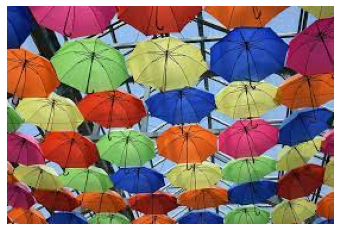

In [43]:
data = cv2.imread('s1.jpg')
data = cv2.cvtColor(data,cv2.COLOR_BGR2RGB)
plt.imshow(data)
plt.axis('off')
plt.show()

Counter({3: 14896, 4: 13724, 2: 7823, 0: 7339, 1: 6543})


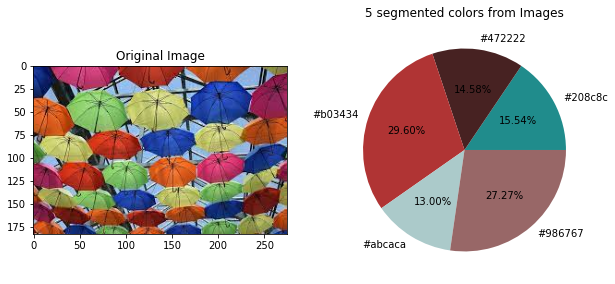

In [44]:
img_k_cluster(data,5)

Counter({4: 52310, 7: 48854, 0: 37476, 1: 32241, 6: 28505, 5: 27301, 2: 21018, 3: 20000, 8: 9001, 9: 7694})


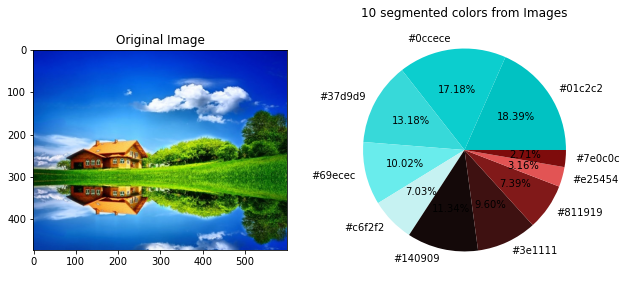

In [47]:
img_k_cluster(a,10)